# 1: Introduction

## 1.1: Stakeholders and Motivation

This project uses the Medical Cost personal Dataset to analyze healthcare expenses and discover the relationships between individual features and medical charges. The reflection from this study is valuble for mulitple stakeholders
1. **Insurance Companies:** Like every other business, Insuarance companies want to avoid any potentiol financial risks. Therefore, having accurate machine learning models to predict medical charges for setting fair premiums is a must in nowadays. 
3. **Healthcare Policymakers:** Studies like this can help policymakers to understand the financial impact of certain factors like smoking, BMI in order to make certain targeted systems/processes. 
4. **Individuals:** This study can help individuals to understand how certain lifestyle choices and demographic factors can influance their medical costs. Therefore, this can help individuals make well informed decisions.
<br><br>

### **Research Questions**
1. Which machine learning model provides the best balance of accuracy, interpretability, and efficiency for predicting medical charges: Linear Regression, Decision Tree, Random Forest, or XGBoost?
2. How does smoking status impact medical charges compared to other factors?
<br><br>

#### **Reasons for these Research question selection.**

**Question 1.1:** Why compare these four machine learning models?


| ML Model         | Reasons                                                                                                                                                                                                                   |
|-------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Linear Regression | Chosen as a baseline model due to its simploicoity, interpretability and to understand any linear relationships before applying more complex models. Furthure, it's widely used in healthcare sector                             |
| Decision Tree     | This can capture non-linear relationships and interactions between features. This can be ideal for variables like BMI and smoking may have non-linear impacts on charges. Often known for easiness of visual representations, which is crucial for explaining certain findings to non-technical stakeholders. |
| Random Forest     | This is a ensemble learning method that combines multiple decision trees and it can improve performance metrics while reducing overfitting. Also, its feature importance metric allows to interpret which factors are most influancial |
| XGBoost           | This is known for its high accuracy and efficiency. XGBoost is a state-of-the aft boosting algorithm widely used in real world applications.                                                                               |


<br><br>
**Question 1.2:** Why not Nueral Network, Support vector Machines, Gradient Boosting Variants, and k-Nearest Neighbors?


| ML Model                          | Reasons for not using them                                                                                                                                                                                                                   |
|-----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Neural Networks                   | Neural networks are powerful but can be unstable for this dataset as: Dataset size: It’s relatively small (~1300 records), which limits the potential of neural networks that usually performs best of large datasets. Interpretability: It can be difficult to explain predictions to stakeholders. Cost: The added complexity and resource requirements aren’t suitable for the dataset’s size and simplicity. |
| Support Vector Machines (SVMs)    | SVMs are good for classification tasks but less commonly used for regression due to: Interpretability: Like neural networks, SVMs lack transparency and it’s a must to gain the trust of stakeholders. Hyperparameter Sensitivity: SVMs need extensive tuning, this can be an issue as added workload, complexity without proportional performance gain compared to models like Random Forest or XGBoost. |
| Gradient Boosting Variants (CatBoost, LightGBM) | These algorithms are strong competitors to XGBoost, however: Redundancy: There’s no need to include all gradient boosting variants since XGBoost already covers this category effectively. Stakeholder Familiarity: XGBoost is widely recognized in both research and industry. Therefore, it makes an ideal choice for this study. |
| k-Nearest Neighbors (k-NN)        | k-NN is simple but not suitable for this project due to: Performance: It often struggles with high-dimensional datasets. Also, it’s sensitive to irrelevant/redundant features. Interpretability: The limitations of feature importance analysis make it less useful when it comes to understanding key factors of medical charges. |



**Question 2:** Reasons for the second question?

- **Obvious Relevence:** This question is a natural choice for analysis as smoking is a well-known factor linked to health costs (Fishman et al., 2003). Most stakeholders can easily understand its importance.
- **Stakeholder Alignment:** This question directly aligns with the interests of stakeholders:
  -  Insurance companies need to understad how smoking can impact premiums.
  -  Policimakers can design targeted and effective interventions so they can reduce smoking related costs. 


## 1.2: Dataset Overview

The dataset contains the following features
- age: Age of the individual.
- sex: Gender of the individual (male/female).
- bmi: Body Mass Index, indicating the individual's health condition.
- children: Number of dependents covered by insurance.
- smoker: Smoking status of the individual (yes/no).
- region: Geographic region of residence (northeast, southeast, southwest, northwest).
- charges: Medical charges billed to the individual (target variable).
This dataset provides a mix of numerical and categorical features.

## 1.3: Performance Metrics

The following metrics will be used to evaluate and compare the selected machine learning models.

- Root Mean Squared Error (RMSE)
- R² (Coefficient of Determination)
- Mean Absolute Error (MAE)
- Training and Prediction Time

# 2: Exploratory Data Analysis (EDA)

## 2.1: Importing libraries 

In [6]:
# importing libraries for data manipulation and analysis
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing crucial libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# using warnings library for a clearner output
import warnings
warnings.filterwarnings('ignore')

Decided to install all the libraries upfront to avoid any potentiol problems while running the notebook. ix of numerical and categorical features.

## 2.2: Data Summarization

### Basic info and first view of the dataset

In [10]:
# loading the adapted insuarance dataset
df = pd.read_csv('insurance-adapted.csv')

# Display basic structure
# Overview of columns, types, and non-null counts
print(df.info())  
print("\n" + "="*65)
 # First 5 rows of the data table
print(df.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB
None

    age     sex     bmi  children smoker     region      charges
0  19.0  female  27.900         0    yes  southwest  16884.92400
1  18.0    male  33.770         1     no  southeast   1725.55230
2  28.0    male  33.000         3     no  southeast   4449.46200
3  33.0    male  22.705         0     no  northwest  21984.47061
4  32.0    male  28.880         0     no  northwest   3866.85520


### **Dataset Structure**
- **Rows and Columns**:The dataset contains `1338 rows` and `7 columns`..
- **Column Descriptions**:
  - `age`: Age of the individual.
  - `sex`: Gender of the individual (`male`/`female`).
  - `bmi`: Body Mass Index, indicating the individual's health condition.
  - `children`: Number of dependents covered by insurance.
  - `smoker`: Smoking status of the individual (`yes`/`no`).
  - `region`: Geographic region of residence (`northeast`, `southeast`, `southwest`, `northwest`).
  - `charges`: Medical charges billed to the individual (target variable).


### Basic statistics of the dataset

In [13]:
# Displaying Summary Statistics
print("\n" + "="*40)
print("      Summary Statistics (Numerical Columns)      ")
print("="*40)
print(df.describe().to_string())

# Displaying value counts for categorical columns
print("\n" + "="*40)
print("      Value Counts for Categorical Columns      ")
print("="*40)

print("\nSex Distribution:")
print("-" * 20)
print(df['sex'].value_counts().to_string())

print("\nSmoker Distribution:")
print("-" * 20)
print(df['smoker'].value_counts().to_string())

print("\nRegion Distribution:")
print("-" * 20)
print(df['region'].value_counts().to_string())



      Summary Statistics (Numerical Columns)      
               age          bmi     children       charges
count  1318.000000  1338.000000  1338.000000   1338.000000
mean     39.216237    30.663397     1.094918  13270.422265
std      14.083151     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

      Value Counts for Categorical Columns      

Sex Distribution:
--------------------
sex
male      676
female    662

Smoker Distribution:
--------------------
smoker
no     1064
yes     274

Region Distribution:
--------------------
region
southeast    364
southwest    325
northwest    325
northeast    324


## 2.3: Missing Data Identification and Treatment

In [15]:
# Checking for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64


- **Missing values**:
  - Total missing values in each column:
    - `age`: 20 missing values
    - `sex`: 0 missing values
    - `bmi`: 0 missing values
    - `children`: 0 missing values
    - `smoker`: 0 missing values
    - `region`: 0 missing values
    - `charges`: 0 missing values
- **Conclusion**: No missing data detected in the dataset.

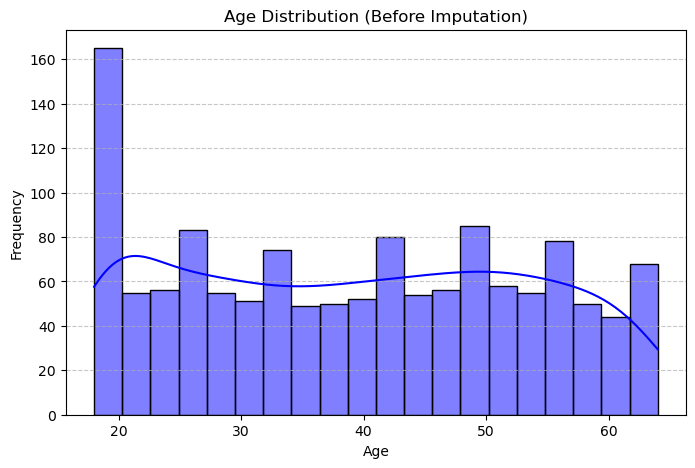

In [17]:
# Visualize the distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution (Before Imputation)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Handle missing values in the 'age' column

In [19]:
# Reasoning: The age distribution is fairly uniform, with no significant skew.
# Using mean imputation as the data is not heavily skewed.
df['age'].fillna(df['age'].mean(), inplace=True)

# Verifying that there are no missing values in the dataset
print("Missing Values in Dataset After Imputation:")
print(df.isnull().sum())


Missing Values in Dataset After Imputation:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## 2.4: Encode Categorical Data

In [21]:
# performing One-hot encoding for 'region'
df_encoded = pd.get_dummies(df, columns=['region'], drop_first=True)

# Encoding 'sex' and 'smoker'
df_encoded['sex'] = df_encoded['sex'].map({'female': 0, 'male': 1})
df_encoded['smoker'] = df_encoded['smoker'].map({'no': 0, 'yes': 1})

# Displaying the first few rows of the transformed dataset
print("\nTransformed Dataset (Head):")
print(df_encoded.head())



Transformed Dataset (Head):
    age  sex     bmi  children  smoker      charges  region_northwest  \
0  19.0    0  27.900         0       1  16884.92400             False   
1  18.0    1  33.770         1       0   1725.55230             False   
2  28.0    1  33.000         3       0   4449.46200             False   
3  33.0    1  22.705         0       0  21984.47061              True   
4  32.0    1  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


**Binary Encoding:**
- Columns like **sex** and **smoker** have only 2 unique outcomes in the dataset.
- Therefore, binary encoding was performed:
  - sex: Female → 0, Male → 1
  - smoker: No → 0, Yes → 1

**One-Hot Encoding:**
- The *region** feature has 4 unique outcomes in the dataset.
- One-hot encoding was performed to represent each region as a seperate binary column:


## 2.5: Data Visualization

### 2.5.1: Visualisation of numerical features

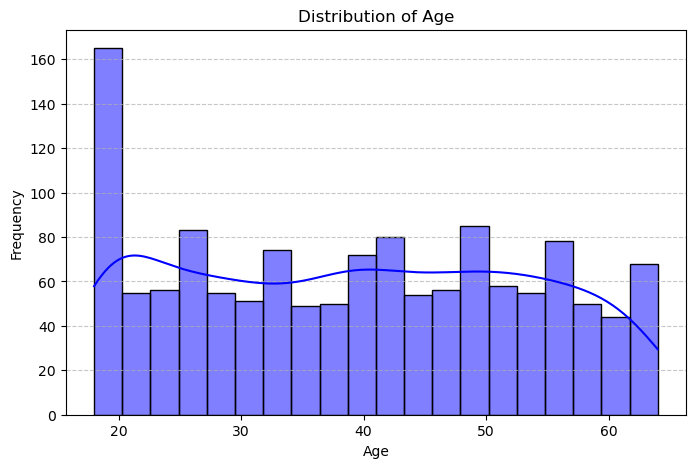

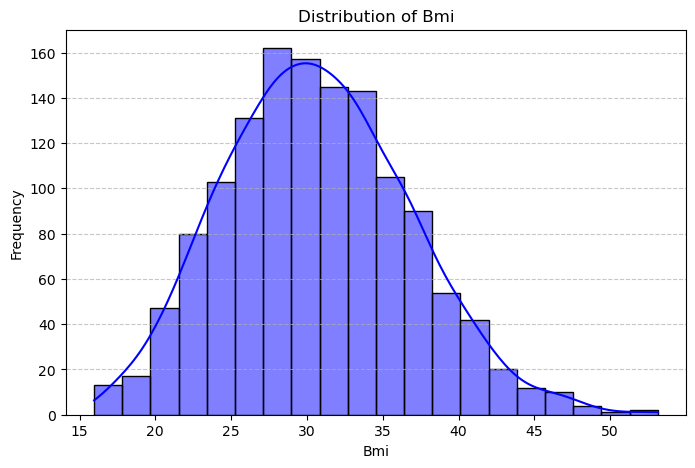

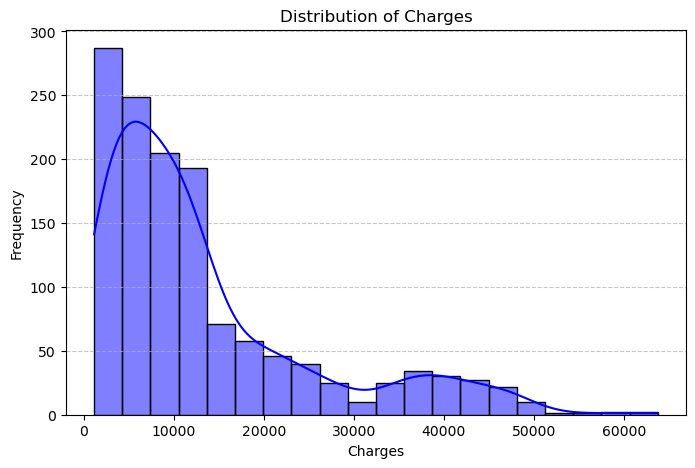

In [25]:
# definning the numerical columns to visualize
numerical_columns = ['age', 'bmi', 'charges']

# Creating histograms for each column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


### Insights from Feature Distributions from numerical features
#### `age`:
- Distribution is fairly uniform across most age groups. But there is a notable peak in the early 20s.
- This suggests a larger representation of younger individuals in the dataset.

#### `bmi`:
- BMI follows a normal distribution centered around 30 (overweight category).
- Outliers with high BMI values (>45) are observed. This may require special attention during analysis.

#### `charges`:
- Medical charges are highly skewed to the right. Further, most charges below `$20,000`.
- The extreme values like those above `$40000` could indicate high-risk individuals (e.g., smokers or individuals with severe health issues).)es.

#### General Implication:
- The distributions for age, bmi, and charges highlight potential areas for preprocessing:
  - Addressing outliers in `bmi` and `charges`.
  - Considering a log transformation for `charges` to reduce skewnes. 

### 2.5.2: Visualisation of categorical features

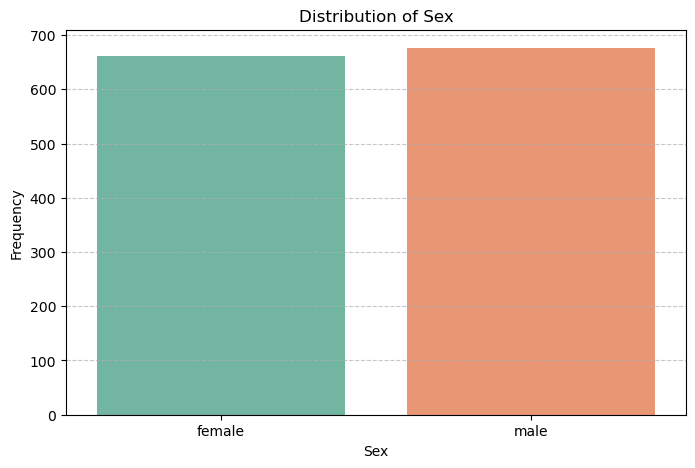

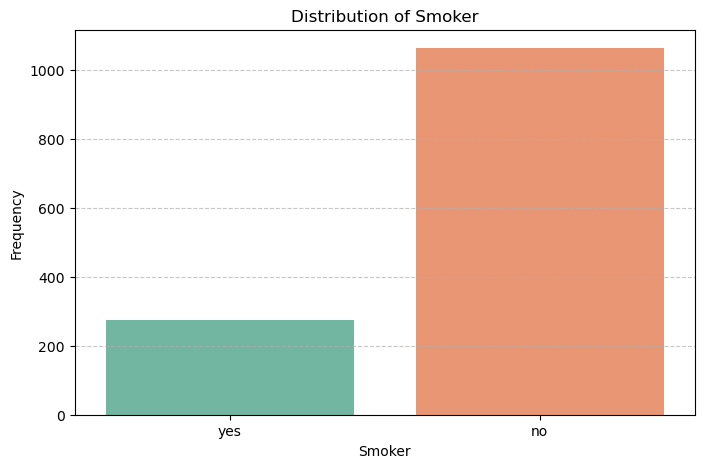

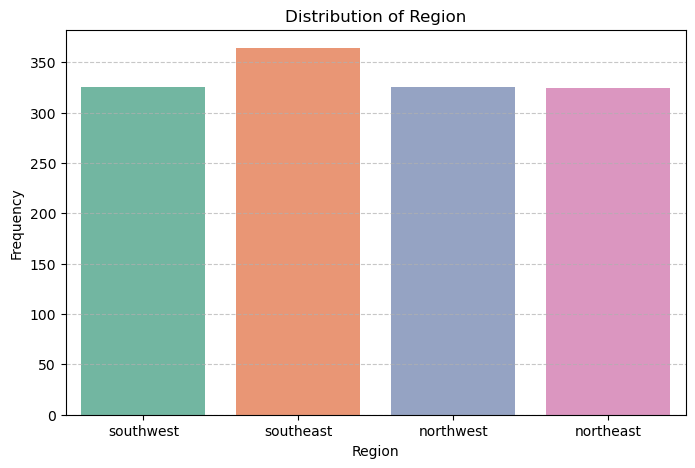

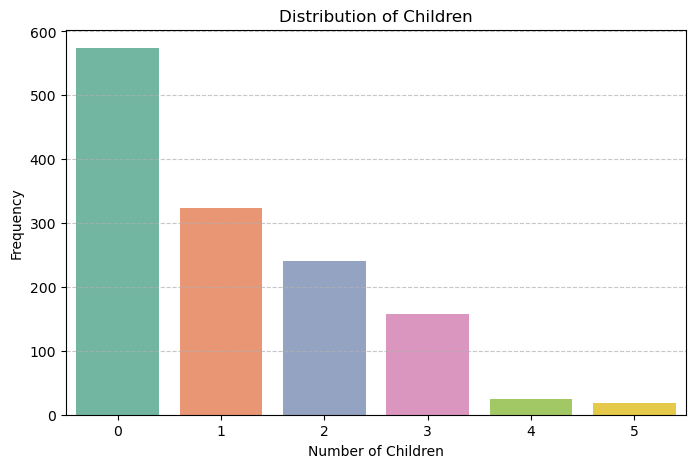

In [28]:
# List of categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Looping through each column and plot
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Plotting distribution of 'children'
plt.figure(figsize=(8, 5))
sns.countplot(x='children', data=df, palette='Set2', hue=None)  
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights from Categorical Feature Distributions
#### `sex`:
- The dataset is evenly distributed between males and females.
- This balance reduces the likelihood of gender-related biases in upcoming model predictions.

#### `smoker`:
- The bar chart shows that approximately 20–25% of the individuals are smokers. The majority (~75–80%) are non-smokers.
- Since the smokers are underrepresented in the dataset, this imbalance can be challanging for models to generalize well for smokers.

#### `region`:
- The dataset is evenly distributed across the four regions. The Southeast slightly more represented and the Southwest slightly less.
- Therefore region-based analyses and predictions are reliable and free from major biases.


#### `children`:
-  **Most Common Group**: Households with no children (`children = 0`) dominate the dataset.
-  **Least Common Groups**: Households with 4 or 5 children are rare.
-  **Trend**: There is a clear decreasing trend in frequency as the number of children increases.

#### `Implications`:
  - Smoking status imbalance may require preprocessing adjustments (e.g., oversampling smokers or applying class weighting) to ensure fair model performance.
  - Balanced distributions for `sex` and `region` allow unbiased and reliable insights for gender- and region-based analyses.
  - The imbalance in `children` categories may influence model predictions, specially for larger families with 4 or 5 children.
  - Further analysis should be done to determine the relationship between the number of children and medical charges. 

### 2.5.3: Scatterplots for Numerical Features vs. charges with smoking status

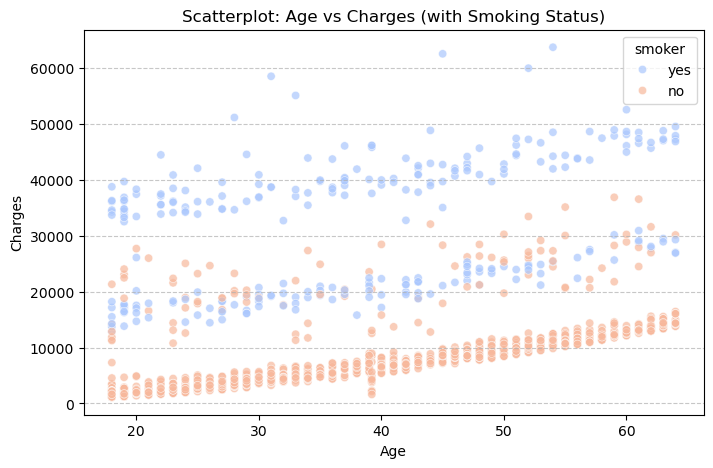

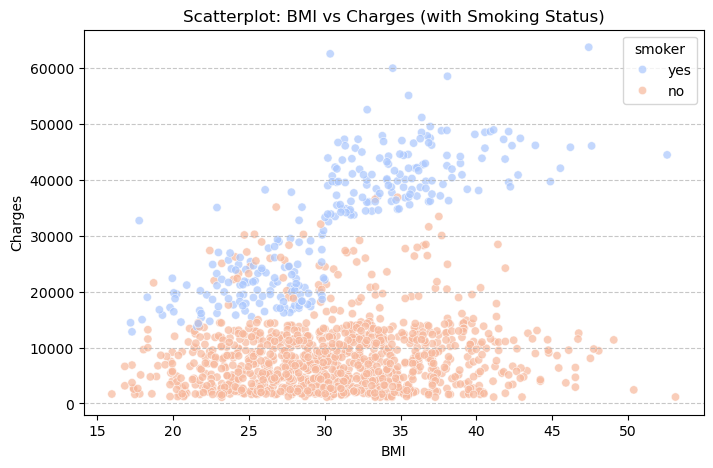

In [31]:
# Scatterplot: age vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot: Age vs Charges (with Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatterplot: bmi vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot: BMI vs Charges (with Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Scatterplots: Numerical Features vs. Charges

#### Age vs. Charges
- **Trend**: Medical charges generally increase with age.
- **Smokers vs. Non-Smokers**: Smokers incur significantly higher charges across all age groups. Also, it's noticibale that the gap widening for older individuals.
- **Outliers**: High-charge outliers are often common among older smokers.
- **Implications**:
  - Age is a meaningful predictor of charges.
  - Smoking status interacts strongly with age and significantly impacts charges.

#### BMI vs. Charges
- **Trend**: Higher BMI correlates with higher charges, especially for individuals classified as overweight or obese.
- **Smokers vs. Non-Smokers**: Smokers consistently have higher charges regardless of BMI, while non-smokers show stable, lower charges across all BMI ranges.
- **Clusters**: Clear clusters of smokers (high charges) and non-smokers (low charges) are visible.
- **Implications**:
  - BMI is a moderately strong predictor of charges.
  - Smoking status amplifies the effect of BMI on charges.
  - Combined analysis of `bmi`, `smoker`, and `charges` is critical.


### 2.5.4: Enhancing above Scatterplots with Regression Lines

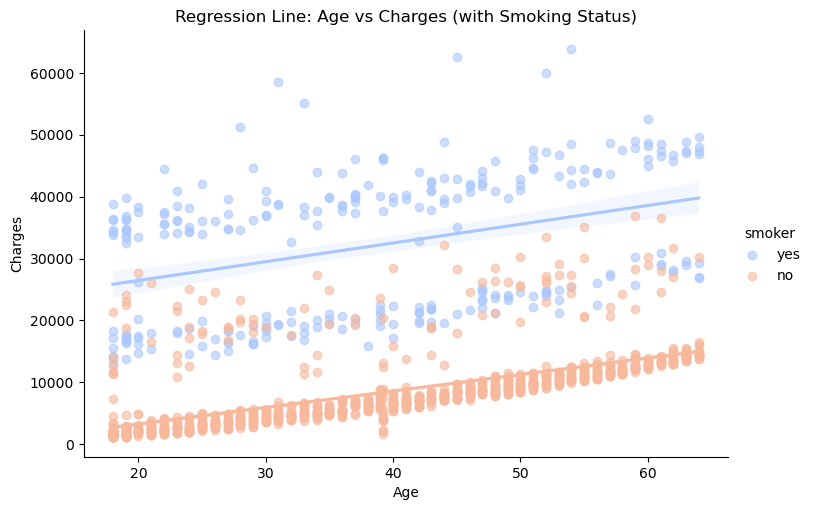

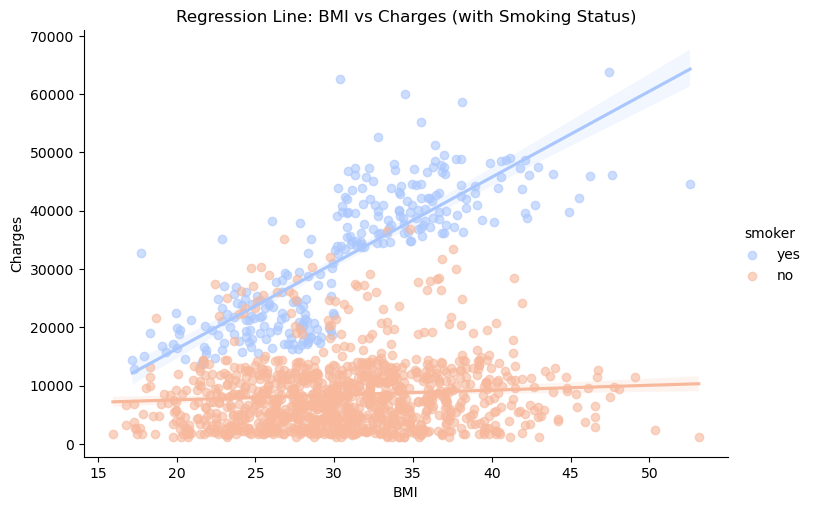

In [34]:
# Enhancing scatterplot with regression line: age vs charges
sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm', height=5, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Regression Line: Age vs Charges (with Smoking Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

# Enhancing scatterplot with regression line: bmi vs charges
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm', height=5, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Regression Line: BMI vs Charges (with Smoking Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

### Enhanced Scatterplots: Regression Lines for Numerical Features vs. Charges

#### Age vs. Charges
- The regression line confirms a positive relationship between `age` and `charges`.
- It's clear that mokers have a steeper slope compared to non-smokers. This indicates that medical charges increase faster with age for smokers.
- This reinforces the impact of smoking on medical costs across different age groups.

#### BMI vs. Charges
- The regression lines reveal distinct trends for smokers and non-smokers:
  - **Smokers**: A strong positive correlation between `bmi` and `charges`. Higher BMI results in significantly higher charges for smokers.
  - **Non-smokers**: A nearly flat regression line, suggesting that BMI has little impact on charges for non-smokers.
- These findings highlight the combined influence of smoking and BMI on medical costs.


### 2.5.5: Children vs charges [Trend Analysis + Boxplot]

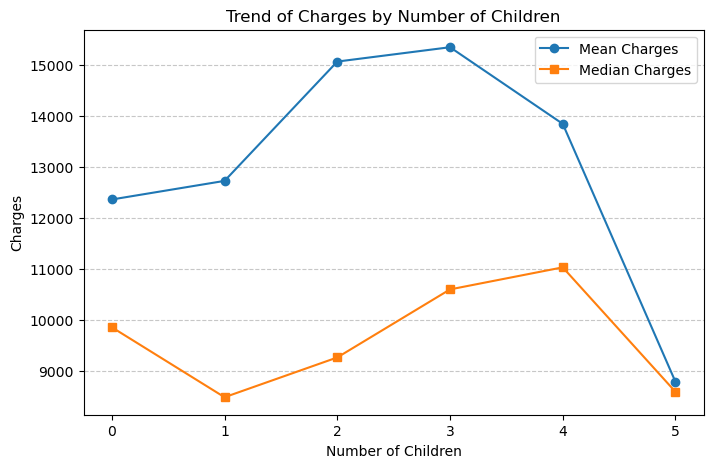

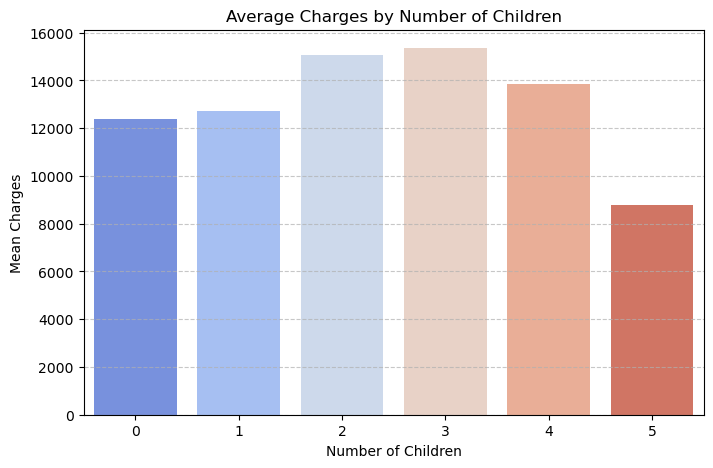

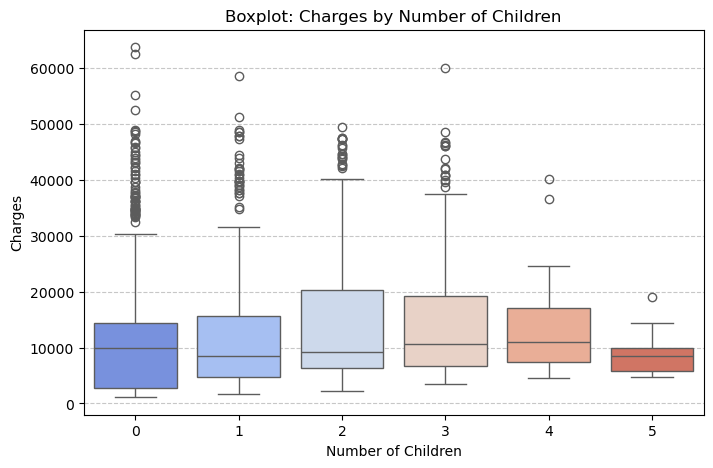

In [37]:
# Group data by 'children' and calculate mean and median charges
children_grouped = df.groupby('children')['charges'].agg(['mean', 'median']).reset_index()

# Line plot for mean and median charges by number of children
plt.figure(figsize=(8, 5))
plt.plot(children_grouped['children'], children_grouped['mean'], marker='o', label='Mean Charges')
plt.plot(children_grouped['children'], children_grouped['median'], marker='s', label='Median Charges')
plt.title('Trend of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for mean charges by number of children
plt.figure(figsize=(8, 5))
sns.barplot(x='children', y='mean', data=children_grouped, palette='coolwarm')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Mean Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for variability of charges across children categories
plt.figure(figsize=(8, 5))
sns.boxplot(x='children', y='charges', data=df, palette='coolwarm')
plt.title('Boxplot: Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis of `children` vs. `Charges`

#### Key Observations
1. **Line Plot**:
   - **Mean Charges**:
     - Charges increase steadily from 0 to 3 children, peaking around 2–3 children.
     - A significant drop in mean charges is observed for families with 4 and 5 children.
   - **Median Charges**:
     - Median charges show smaller fluctuations but follow a similar decreasing trend for families with 5 children.
     - The gap between mean and median charges highlights the presence of high-cost outliers, especially in families with fewer children.

2. **Bar Plot**:
   - Reinforces the trend in mean charges, showing:
     - Highest average charges for families with 2–3 children.
     - Lowest average charges for families with 5 children.

3. **Box Plot**:
   - **Variability**:
     - The spread of charges is highest for 2–3 children, indicating more variability in healthcare costs.
     - Families with 5 children have the lowest spread and charges, suggesting lower overall healthcare costs.
   - **Outliers**:
     - Significant outliers (high charges) are visible across all groups but are more concentrated in smaller families (0–3 children).

#### Implications
- **Trend**:
  - Individuals with 0–3 children may prioritize their own healthcare, resulting in higher charges.
  - Charges decline sharply for families with 4–5 children. This can may indicate deprioritization of personal healthcare.
- **Modeling Insights**:
  - The relationship between `children` and `charges` is non-linear. It can make it important to consider interaction terms or group-based encoding for modeling.
  - The presence of outliers suggests the need for robust models or preprocessing steps like scaling or trimming.


### 2.5.6: Smoking vs charges [Bar chart + Boxplot]

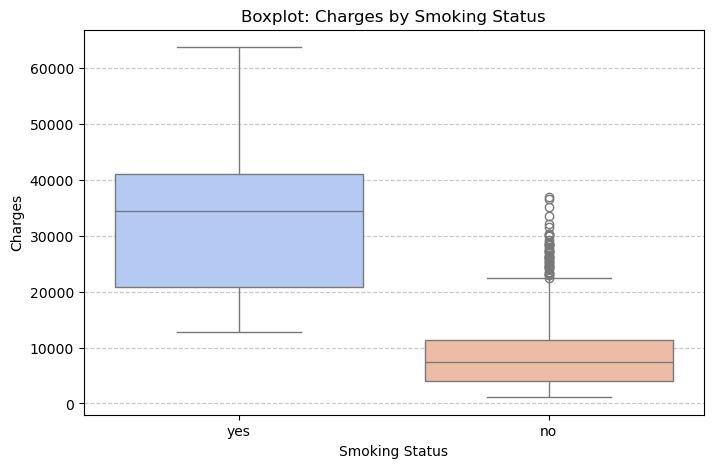

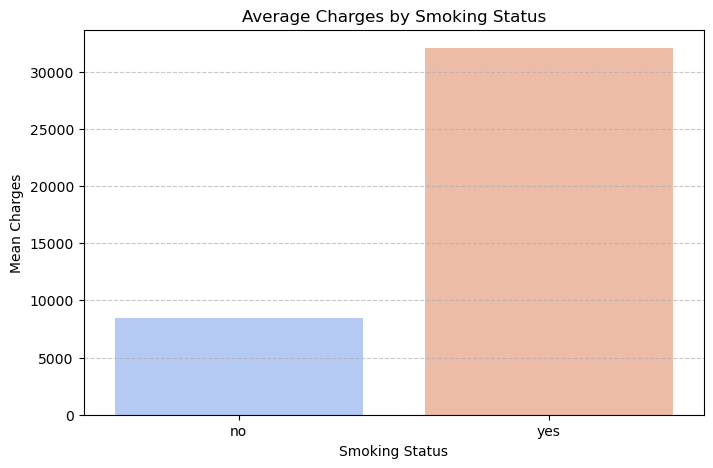

In [40]:
# Boxplot: Smoker vs Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df, palette='coolwarm')
plt.title('Boxplot: Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Plot for Mean Charges
smoker_grouped = df.groupby('smoker')['charges'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='mean', data=smoker_grouped, palette='coolwarm')
plt.title('Average Charges by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Mean Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analysis of `smoker` vs. `Charges`

#### Key Observations

1. **Boxplot**:
   - **Smokers**:
     - Have significantly higher medical charges compared to non-smokers.
     - Show greater variability in charges, as indicated by a wider interquartile range (IQR).
   - **Non-Smokers**:
     - Have lower and more consistent charges.
     - Show visible outliers with exceptionally high charges, potentially due to severe health conditions unrelated to smoking.

2. **Bar Plot**:
   - The mean charges for smokers are more than **3 times higher** than those for non-smokers.
   - This highlights the strong impact of smoking on medical expenses.

#### Implications
- Smoking status is a dominant factor influencing medical costs.
- The variability in charges among smokers may reflect smoking-related illnesses with varying severity.
- The presence of outliers among non-smokers suggests that factors other than smoking like, chronic conditions, age might also contribute to high medical charges.

### 2.5.7: Smoking vs charges [Bar chart + Boxplot]: Enhanced code

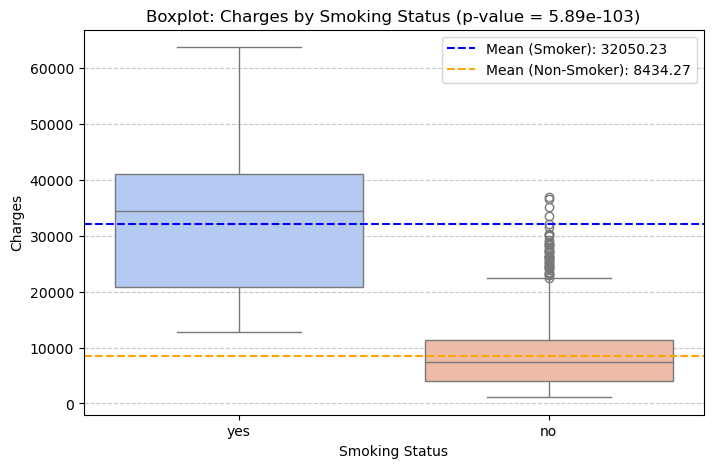

In [44]:
from scipy.stats import ttest_ind

# Performing a t-test to test the difference in charges between smokers and non-smokers
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)

# Enhanced Boxplot with Statistical Annotation
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=df, palette='coolwarm')

# Annotating p-value on the plot
plt.title(f'Boxplot: Charges by Smoking Status (p-value = {p_value:.2e})')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Overlaying Mean/Median Lines
mean_smoker = smoker_charges.mean()
mean_non_smoker = non_smoker_charges.mean()
plt.axhline(mean_smoker, color='blue', linestyle='--', label=f'Mean (Smoker): {mean_smoker:.2f}')
plt.axhline(mean_non_smoker, color='orange', linestyle='--', label=f'Mean (Non-Smoker): {mean_non_smoker:.2f}')
plt.legend()
plt.show()


### Enhanced Analysis of `smoker` vs. Charges

#### Key Observations
1. **Mean Charges**:
   - Smokers incur an average medical charge of **32,050**, nearly **4 times higher** than non-smokers (**8,434**).
2. **Variability**:
   - Smokers show greater variability in charges, as reflected by a wider interquartile range (IQR).
   - Non-smokers have less variability but include visible outliers with very high charges.
3. **Statistical Significance**:
   - The p-value from the t-test is **5.89e-103**. This clearly confirms that the difference in charges between smokers and non-smokers is statistically significant.
   - This small p-value means the likelihood of this difference occurring by random chance is effectively zero.

#### Implications for Modeling
- Smoking status (`smoker`) is expected to be a **strong predictor** of medical charges.
- Interaction effects (e.g., `smoker` with `bmi`) may further improve the model's performance.
- Outliers in non-smokers should be considered during preprocessing to avoid skewing the model.


### 2.5.8: Region vs charges [Bar chart + Boxplot]

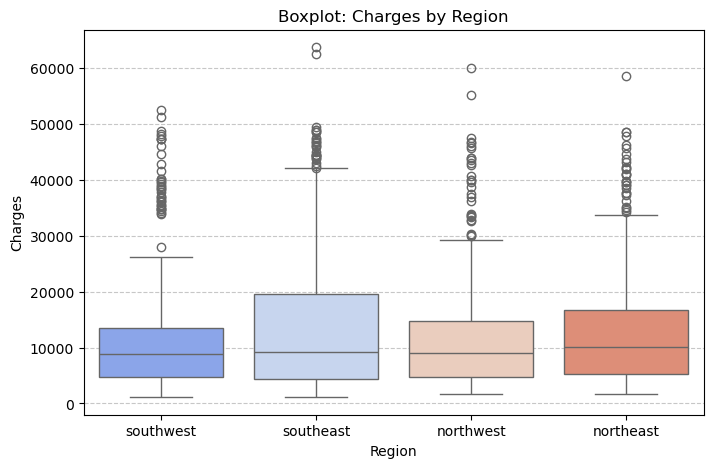

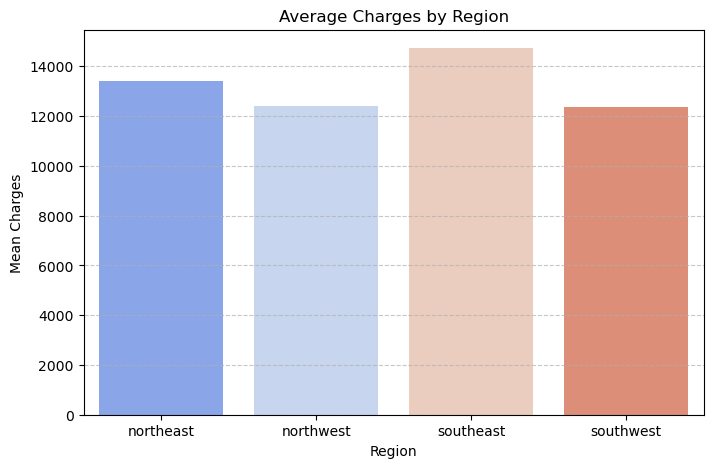

In [47]:
# Boxplot: Region vs Charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='charges', data=df, palette='coolwarm')
plt.title('Boxplot: Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Plot: Average Charges by Region
region_grouped = df.groupby('region')['charges'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='region', y='mean', data=region_grouped, palette='coolwarm')
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Mean Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insights from Region vs. Charges

- **Southeast** region has the **highest average charges**, followed by the **northeast**.
- **Southwest** and **northwest** regions show slightly lower mean charges, with minimal differences.
- Variability is higher in the **southeast**, with more extreme outliers.
- **General Trend**: Regional differences are **minor**. This suggests **region** may have a weaker influence compared to other features.

### Implication

- `region` will be retained as a categorical feature for modeling.
- Its impact is likely secondary to stronger predictors like **smoker** and **bmi**.


### 2.5.9: Sex vs charges [Bar chart + Boxplot]

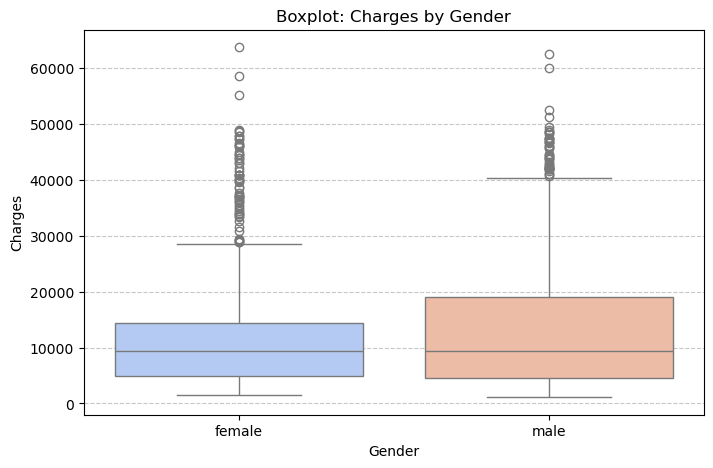

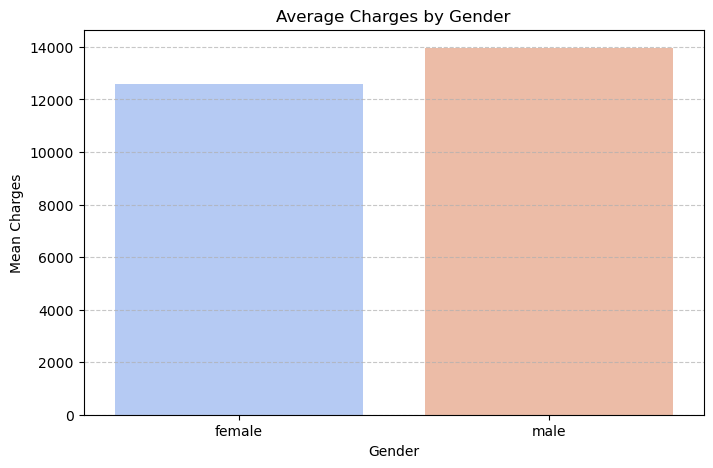

In [50]:
# Boxplot: Charges by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=df, palette='coolwarm')
plt.title('Boxplot: Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Plot: Average Charges by Gender
sex_grouped = df.groupby('sex')['charges'].agg(['mean', 'median']).reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='mean', data=sex_grouped, palette='coolwarm')
plt.title('Average Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Charges')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Insights from Sex vs. Charges

- The distributions of charges for **males** and **females** are nearly identical.
- Mean charges are slightly higher for **males**, but the difference is negligible.
- Outliers are present in both groups, with no significant difference in variability.

### Implication

- `sex` will be included as a feature, but it is expected to have minimal influence on charges compared to stronger predictors like `smoker` and `bmi`.


### 2.5.10: Advanced Data Visualization: Correlation Heatmap

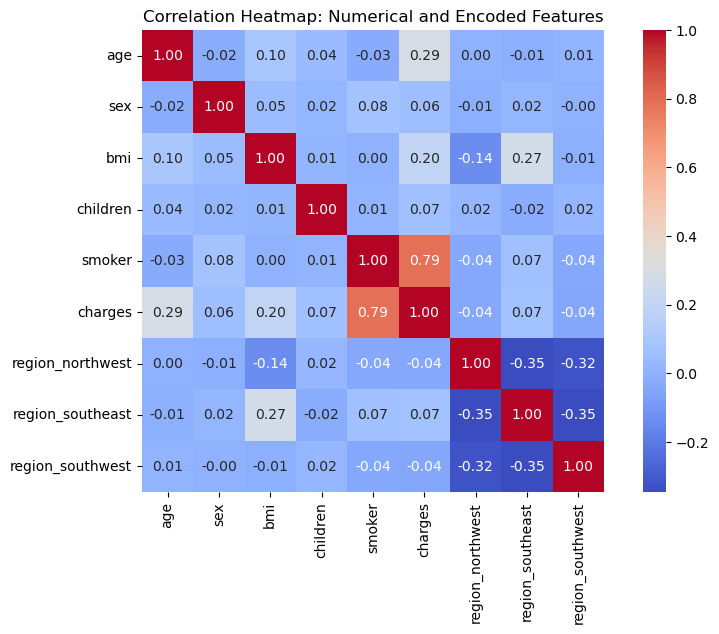

In [53]:
# Compute correlation matrix (all numerical and encoded categorical data)
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap: Numerical and Encoded Features')
plt.show()


## Correlation Heatmap: Numerical and Encoded Features

- **Why Encoded Data is Used:**
  - Correlation analysis requires numerical data; categorical variables must be encoded.
  - Using the encoded dataset here allows to explore relationships between all features, including categorical ones.
  - Encoding was deferred earlier for visualizations to retain interpretability.

- **Key Observations:**
  - `smoker` has a strong positive correlation with `charges` (0.79), indicating its major impact.
  - `age` (0.30) and `BMI` (0.20) show moderate positive correlations with `charges`.
  - Weak correlations are observed for `children` and `region` with `charges`. It suggests limited influence.

- **Relevance for Model Training:**
  - Features like `smoker`, `age`, and `BMI` are strong predictors for the target variable.
  - `children` and `region` might require further evaluation for inclusion or dimensionality reduction.



# 3: Data Preprocessing

## 3.1: Data standardization

### 3.1.1: Numerical data standardization

In [58]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['age', 'bmi', 'children', 'charges']

# Applying the scaler to numerical features
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

# Step 4: Display summary statistics for the scaled features
print("\n" + "="*50)
print("          Scaled Data Summary (Numerical Features)")
print("="*50)
print(df_scaled[numerical_features].describe().to_string())

# Step 5: Display the first few rows of the scaled dataset
print("\n" + "="*50)
print("          Head of the Scaled Dataset")
print("="*50)
print(df_scaled.head())


          Scaled Data Summary (Numerical Features)
                age           bmi      children       charges
count  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03
mean   4.354597e-16 -2.124194e-16 -5.576008e-17 -8.098488e-17
std    1.000374e+00  1.000374e+00  1.000374e+00  1.000374e+00
min   -1.518461e+00 -2.412011e+00 -9.086137e-01 -1.003557e+00
25%   -8.743248e-01 -7.164063e-01 -9.086137e-01 -7.046504e-01
50%    5.085405e-16 -4.320880e-02 -7.876719e-02 -3.212089e-01
75%    8.433723e-01  6.611572e-01  7.510793e-01  2.783441e-01
max    1.773792e+00  3.685522e+00  3.240619e+00  4.171663e+00

          Head of the Scaled Dataset
        age  sex       bmi  children  smoker   charges  region_northwest  \
0 -1.446890    0 -0.453320 -0.908614       1  0.298584             False   
1 -1.518461    1  0.509621 -0.078767       0 -0.953689             False   
2 -0.802754    1  0.383307  1.580926       0 -0.728675             False   
3 -0.444900    1 -1.305531 -0.908614       0  0.

### 3.1.2: Why We Standardized the Data

- **Why Standardization?**
  - Our features like `age`, `bmi`, `charges`, and `children` have very different ranges. For example, `charges` go up to 60,000, while `children` is just a small number. If we don't standardize, models like Linear Regression might give too much importance to features with larger values.
  - By standardizing, we ensure all numerical features are on the same scale (mean = 0, standard deviation = 1), which makes it fairer for the algorithms to consider all features equally.

- **Why Not Normalization?**
  - Normalization squeezes the data into a fixed range (e.g., 0 to 1), but that's not necessary here. Models like Linear Regression and Decision Trees work fine with standardized data.
  - Also standardization is better when there are outliers, like with `charges`.

- **What We Did:**
  - We standardized the numerical features and saved the new version as `df_scaled`. This ensures our data is ready for preprocessing, training and evaluation.
  - For categorical features like `sex`, `smoker`, and `region`, we already encoded them earlier, so no further scaling was needed.

- **Why This Matters:**
  - Standardizing improves how the models perform, especially when they involve gradients or distance calculations.
  - It prevents models from being biased by large-scale features, making the results more accurate and reliable.


## 3.2: Data representation/ Balance-imbalance discussion

| Feature     | Description                                                                 | Impact on ML Tasks                                                                                     | Implications                                                                                     |
|-------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Smoker**  | Majority are non-smokers (~80%), with only ~20% smokers.                   | The model might underperform for smokers due to their underrepresentation.                | Balancing techniques may be required if evaluation metrics indicate poor performance for smokers.|
| **Sex**     | Even distribution between males and females.                               | No significant bias is expected based on gender.                                           | No specific preprocessing required for this feature.                                             |
| **Region**  | Southeast slightly overrepresented compared to other regions.              | Predictions for Southwest, Northwest, or Northeast might be less robust.                  | Monitor during model evaluation to ensure no regional biases.                                    |
| **Children**| Households with 0, 1, or 2 children dominate, while 4 or 5 are rare.       | The model might struggle to generalize for families with more children (4 or 5).          | Further analysis required; balancing might improve generalization for higher child counts.       |
| **Charges** | Highly skewed distribution; most values are below $20,000, with outliers.  | Skewness could bias regression models towards lower charges, underestimating higher values.| Log transformation or similar preprocessing might address skewness.                             |


## 3.3: Feature selection/reduction

### 3.3.1: Compute Correlations

In [64]:
# Compute correlation matrix for numerical features
correlation_matrix = df_encoded.corr()

# Identify features with high correlation (> 0.8) and list pairs
high_correlation_pairs = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1)].stack()
print("Highly correlated feature pairs:\n", high_correlation_pairs)


Highly correlated feature pairs:
 Series([], dtype: float64)


### Feature Correlation Analysis

- After calculating the correlation matrix, we found that none of the features have a correlation greater than 0.8.
- This means there are no highly redundant features in the dataset that need to be removed or combined.
- Therefore, no feature reduction is needed based on correlation at this stage.


### 3.3.2: Linear Regression for Feature Importance

In [67]:
# Separate features (X) and target (y) using the scaled dataset
X_scaled = df_scaled.drop(columns=['charges'])  # Drop the target
y_scaled = df_scaled['charges']

# Train a linear regression model
model = LinearRegression()
model.fit(X_scaled, y_scaled)

# Extract feature importance (coefficients)
feature_importance_scaled = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': model.coef_})
feature_importance_scaled = feature_importance_scaled.sort_values(by='Importance', ascending=False)

feature_importance_scaled_first = feature_importance_scaled.copy()

# Display feature importance
print(feature_importance_scaled)

            Feature  Importance
4            smoker    1.971120
0               age    0.296046
2               bmi    0.173380
3          children    0.048178
1               sex   -0.010654
5  region_northwest   -0.029586
7  region_southwest   -0.078974
6  region_southeast   -0.086973


### Feature Importance Analysis using Linear Regression

- We used a Linear Regression model to assess the importance of each feature with respect to the target variable (charges).
- The `smoker` feature has the highest importance, followed by `age`, `bmi`, and `children`. This shows that smoking status has a significant impact on medical charges.
- Features like `region_northwest`, `region_southeast`, and `region_southwest` have lower importance in determining medical charges, suggesting that they have less influence on the target variable.
- This analysis helps us understand which features contribute most to the prediction and can guide future steps in the model-building process, such as feature selection or engineering.


## 3.4 Extra justified EDA/Data Processing


### 3.4.1: Address outliers in `bmi`

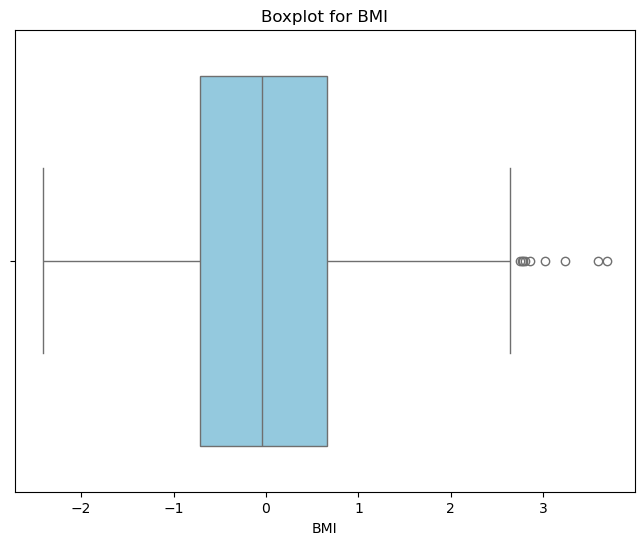

In [71]:
# Boxplot for BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_scaled['bmi'], color='skyblue')
plt.title("Boxplot for BMI")
plt.xlabel("BMI")
plt.show()

- **Observation:** The boxplot exhibits some potential outliers in the BMI feature, primarily on the higher end.
- **Rationale for Handling:** Outliers in BMI can skew the analysis, especially when it comes to disproportionately impact the medical charges.


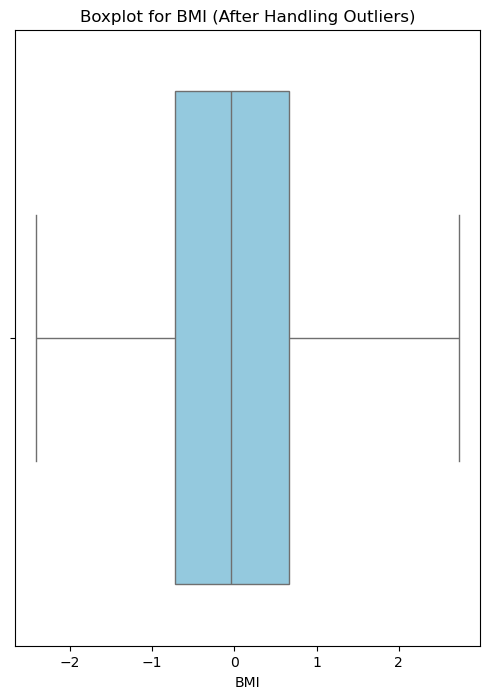

In [73]:
# Calculatting Q1, Q3, and IQR for BMI
Q1 = df_scaled['bmi'].quantile(0.25)
Q3 = df_scaled['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping BMI values
df_scaled['bmi'] = np.where(df_scaled['bmi'] < lower_bound, lower_bound, df_scaled['bmi'])
df_scaled['bmi'] = np.where(df_scaled['bmi'] > upper_bound, upper_bound, df_scaled['bmi'])

plt.figure(figsize=(6, 8))
sns.boxplot(data=df_scaled, x='bmi', color='skyblue')
plt.title('Boxplot for BMI (After Handling Outliers)')
plt.xlabel('BMI')
plt.show()

### Handling Outliers in BMI

Outliers in the BMI feature were addressed using the Interquartile Range (IQR) method:

- **Step 1**: Calculated the IQR to identify lower and upper bounds for typical data values.
- **Step 2**: Capped outliers at the respective boundary values.

### 3.4.2: Address outliers in `charges`

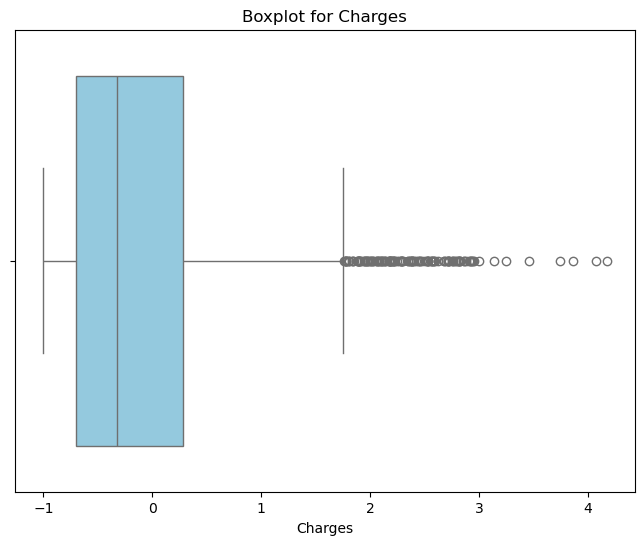

In [76]:
# Visualizing outliers for charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, x='charges', color='skyblue')
plt.title("Boxplot for Charges")
plt.xlabel("Charges")
plt.show()


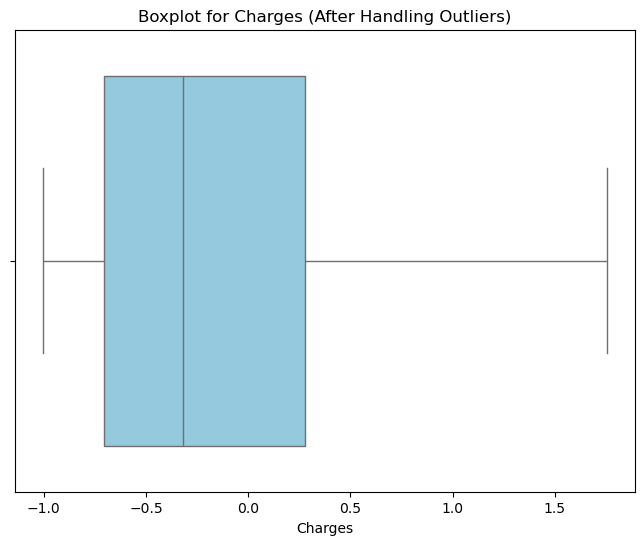

In [77]:
# Calculating IQR for charges
Q1_charges = df_scaled['charges'].quantile(0.25)
Q3_charges = df_scaled['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges

# Defining bounds
lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

# Capping outliers
df_scaled['charges'] = df_scaled['charges'].clip(lower=lower_bound_charges, upper=upper_bound_charges)

# Verifying changes with a new boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, x='charges', color='skyblue')
plt.title("Boxplot for Charges (After Handling Outliers)")
plt.xlabel("Charges")
plt.show()


#### Handling Outliers in `charges`
Asat the boxplot for `charge suggestss`, we noticed there were some extreme outliers. These can mess with model performancetherefore, the following actions were takenws:

1. **Capping Outliers**: 
   - We used the IQR (Interquartile Range) method to identify the outliers.
   - Any values that were way too high got capped to the upperxplot).

2. **Final Result**: 
   - After capping, the boxplot shows a much cleaner distribution without those extrememe points.


### 3.4.3: Apply Log Transformation to `charges` to Address Skewness

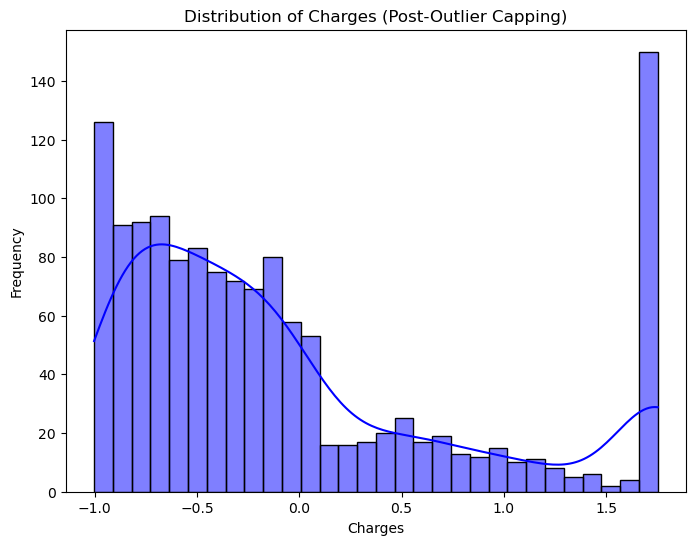

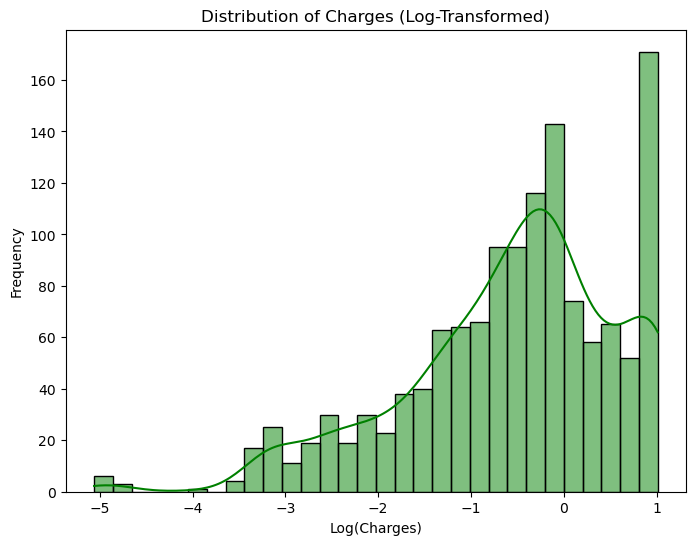

In [80]:
# Visualize current distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_scaled['charges'], kde=True, bins=30, color="blue")
plt.title("Distribution of Charges (Post-Outlier Capping)")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Apply log transformation
df_scaled['charges_log'] = np.log1p(df_scaled['charges'])

# Visualize transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_scaled['charges_log'], kde=True, bins=30, color="green")
plt.title("Distribution of Charges (Log-Transformed)")
plt.xlabel("Log(Charges)")
plt.ylabel("Frequency")
plt.show()


### Log Transformation of `Charges`

To address the skewness in the `charges` distribution, a log transformation was applied. While outlier capping helped reduce extreme values, the distribution remained highly skewed. The log transformation brought the data closer to a normal-like distribution, which:
- Helps improve model performance by stabilizing variance.
- Reduces the impact of extreme values on predictions.
- Aligns the distribution better with assumptions of many machine learning models.

The comparison between the capped and log-transformed distributions confirms that the log-transformed version is better suited for further analysis and modeling.


#### Checking if `charges_log` has missing values after log transformation

In [83]:
print(df_scaled.isnull().sum())

age                  0
sex                  0
bmi                  0
children             0
smoker               0
charges              0
region_northwest     0
region_southeast     0
region_southwest     0
charges_log         10
dtype: int64


In [84]:
# Step 1: Applying log transformation with error handling
df_scaled['charges_log'] = np.log1p(df_scaled['charges'])

# Step 2: Handling missing values post-log transformation
if df_scaled['charges_log'].isna().sum() > 0:
    print(f"Missing values in 'charges_log': {df_scaled['charges_log'].isna().sum()}")
    df_scaled = df_scaled.dropna(subset=['charges_log'])
    print("Rows with missing 'charges_log' values have been removed to maintain data consistency.")

Missing values in 'charges_log': 10
Rows with missing 'charges_log' values have been removed to maintain data consistency.


#### Log Transformation and Handling Missing Values

To tackle the skewness in `charges`,log transformation was applied. This resulted in a few missing values (10 rows), likely due to edge cases in the data. Instead of imputing these values, which could have altered the natural distribution and caused unwanted spikes, we chose to remove the affected rows. This approach ensures the data remains clean and unbiased for our modeling process.

### 3.4.4: Handle Smoking Status Imbalance:

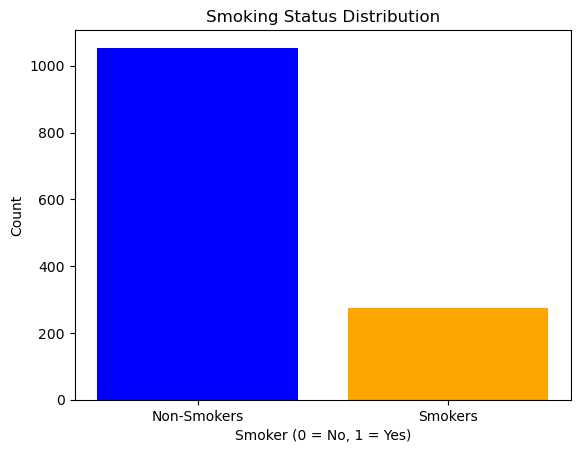

In [87]:
# Visualizing Smoking Status Distribution
smoker_counts = df_scaled['smoker'].value_counts()

plt.bar(smoker_counts.index, smoker_counts.values, color=['blue', 'orange'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Non-Smokers', 'Smokers'], rotation=0)
plt.show()


In [88]:
from sklearn.utils import resample

# Separate majority and minority classes
non_smokers = df_scaled[df_scaled['smoker'] == 0]
smokers = df_scaled[df_scaled['smoker'] == 1]

# Oversample minority class (smokers)
smokers_oversampled = resample(smokers, 
                               replace=True,  # Sample with replacement
                               n_samples=len(non_smokers),  # Match majority class size
                               random_state=42)  # Reproducibility

# Combine majority and oversampled minority classes
df_balanced = pd.concat([non_smokers, smokers_oversampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the new distribution
print(df_balanced['smoker'].value_counts())


smoker
1    1054
0    1054
Name: count, dtype: int64


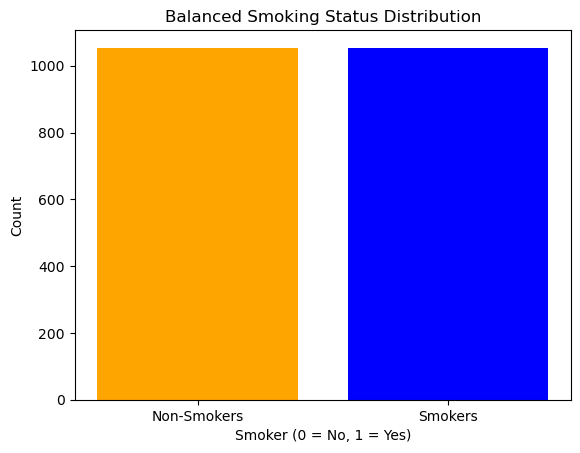

In [89]:
# Visualizing Balanced Smoking Status Distribution
smoker_counts_balanced = df_balanced['smoker'].value_counts()

plt.bar(smoker_counts_balanced.index, smoker_counts_balanced.values, color=['blue', 'orange'])
plt.title('Balanced Smoking Status Distribution')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Non-Smokers', 'Smokers'], rotation=0)
plt.show()


### Addressing Class Imbalance in Smoking Status

#### Initial Distribution
The dataset initially displayed a significant imbalance in the `smoker` feature. The non-smokers comprising the majority (~80%) and smokers being underrepresented (~20%). This imbalance could bias the model towards non-smokers. This can lead to inaccurate predictions for smokers.

#### Balancing Technique
To address this, we oversampled the minority class (smokers) to match the size of the majority class (non-smokers). This ensures equal representation of both classes, mitigating the risk of biased predictions.

#### Balanced Distribution
The new dataset contains an equal number of smokers and non-smokers, as shown in the post-balancing visualization. This balanced dataset will be used for model training to improve prediction performance across both classes.


### 3.4.5: Check Balanced Dataset Implications:

#### Step 1: Compare Feature Distributions Pre- and Post-Oversampling

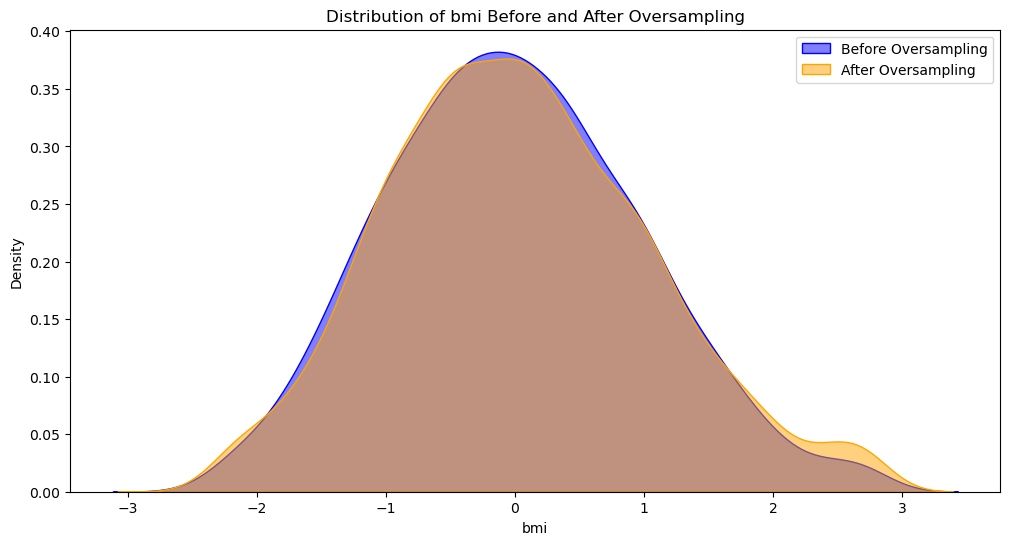

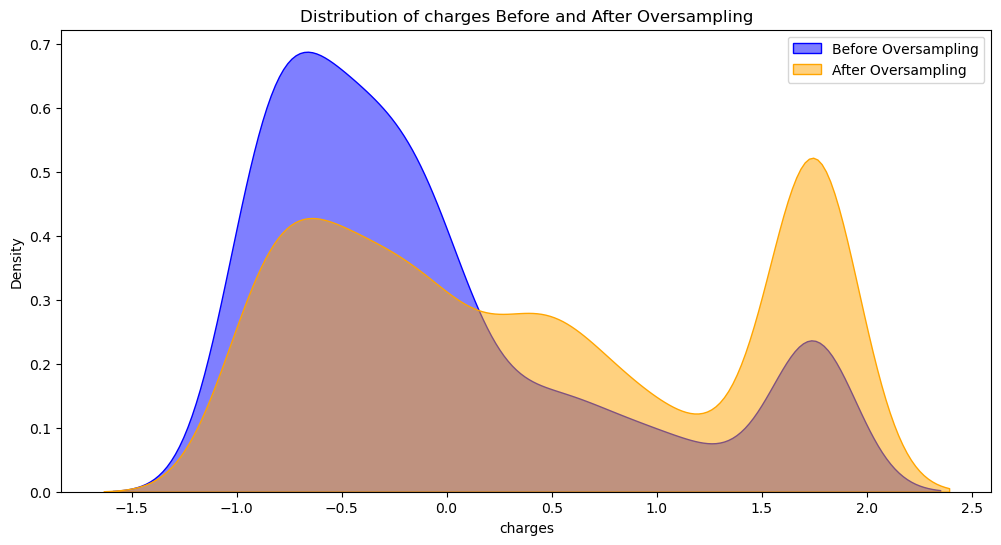

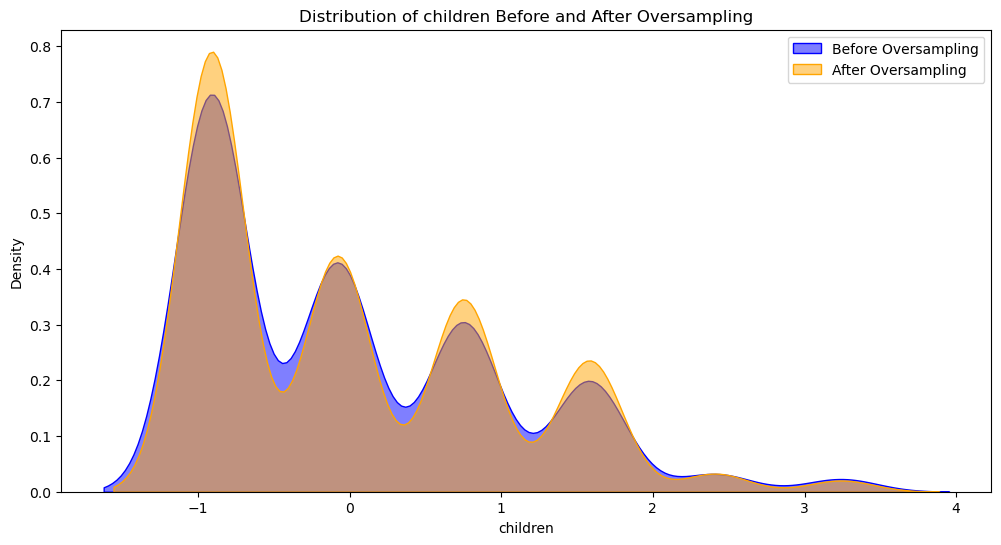

In [93]:
# Features to compare
features_to_compare = ['bmi', 'charges', 'children']

# Plot distributions before and after oversampling
for feature in features_to_compare:
    plt.figure(figsize=(12, 6))
    
    # Pre-Oversampling
    sns.kdeplot(df_scaled[feature], label='Before Oversampling', color='blue', fill=True, alpha=0.5)
    
    # Post-Oversampling
    sns.kdeplot(df_balanced[feature], label='After Oversampling', color='orange', fill=True, alpha=0.5)
    
    plt.title(f'Distribution of {feature} Before and After Oversampling')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


### Oversampling Effects on Feature Distributions

To ensure a balanced representation of the `smoker` feature in the dataset, we applied oversampling using the SMOTE (Synthetic Minority Oversampling Technique) approach. Oversampling introduced synthetic samples for the minority class (`smoker = 1`), which leads to a more balanced dataset. Here are the visual comparisons of feature distributions before and after oversampling:

- **BMI Distribution:** The overall distribution of `bmi` remains consistent. This indicates that the synthetic samples closely align with the original data's feature characteristics.
- **Charges Distribution:** The distribution of `charges` shows slight differences after oversampling. While the synthetic samples align reasonably well with the original distribution. But there are some shifts are observed in the higher ranges due to the minority class's characteristics.
- **Children Distribution:** The feature `children` retains its multi-modal structure. This demostrates demonstrating that SMOTE effectively maintains feature distribution integrity while balancing the `smoker` classes.

Oversampling has preserved the distributions of other features, ensuring that the newly generated samples do not introduce unrealistic patterns.


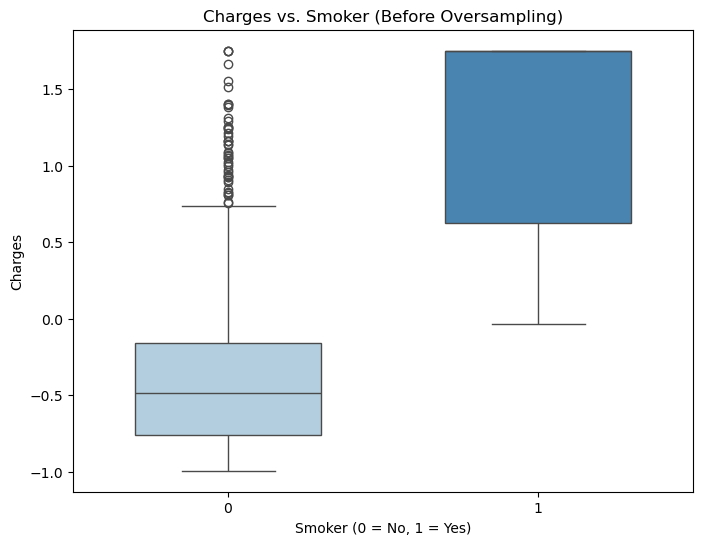

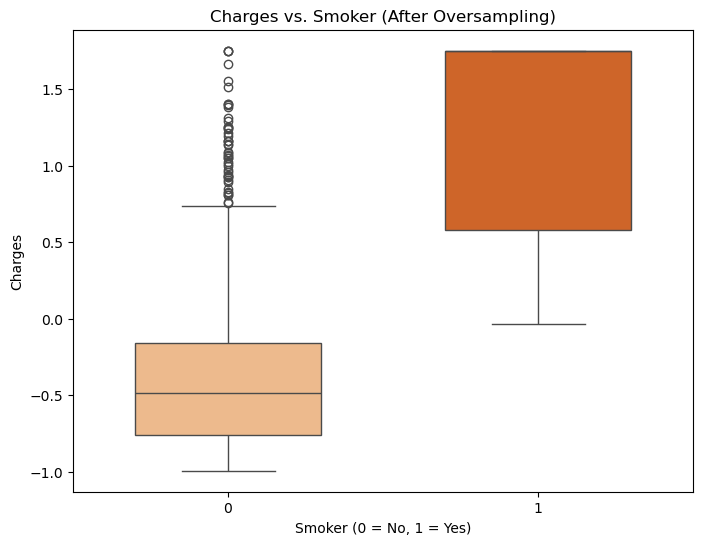

In [95]:
# Plot smoker vs. charges before and after oversampling
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df_scaled, palette='Blues', width=0.6)
plt.title('Charges vs. Smoker (Before Oversampling)')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df_balanced, palette='Oranges', width=0.6)
plt.title('Charges vs. Smoker (After Oversampling)')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Charges')
plt.show()


### Charges vs. Smoker Status (Before and After Oversampling)

To analyze the impact of smoker status on medical charges and assess the effect of oversampling, we compared the distribution of charges before and after oversampling:

- **Before Oversampling:** 
  - Smokers (coded as 1) are a minority in the dataset, leading to an imbalance. Non-smokers (coded as 0) dominate the data.
  - Smokers consistently have higher charges compared to non-smokers, as shown by the higher median and range of the boxplot.
  - The imbalance could lead to biased predictions, where the model underestimates the impact of being a smoker.

- **After Oversampling:** 
  - The smoker group has been oversampled to balance the data with non-smokers. This adjustment creates an equal representation of both groups.
  - Balancing ensures the model trains on a fair representation of smokers, improving its ability to generalize and make accurate predictions for this underrepresented group.
  - The outliers among smokers and non-smokers remain, but the key focus is on addressing the imbalance.

By addressing the imbalance in smoker status, this step reduces the risk of biased predictions and improves the fairness of the model’s performance across all smoker groups.


### 3.4.6: Interaction Analysis::

#### Step 1: Analyze Interaction Between `smoker` and `bmi`

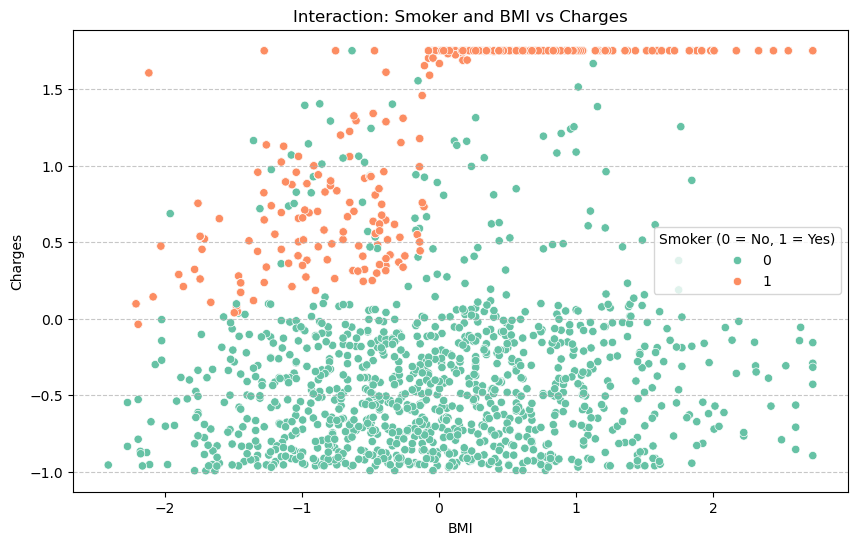

In [99]:
# Scatter plot to analyze the interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_balanced, x='bmi', y='charges', hue='smoker', palette='Set2')
plt.title('Interaction: Smoker and BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Step 2: Analyze Interaction Between `smoker` and `age`

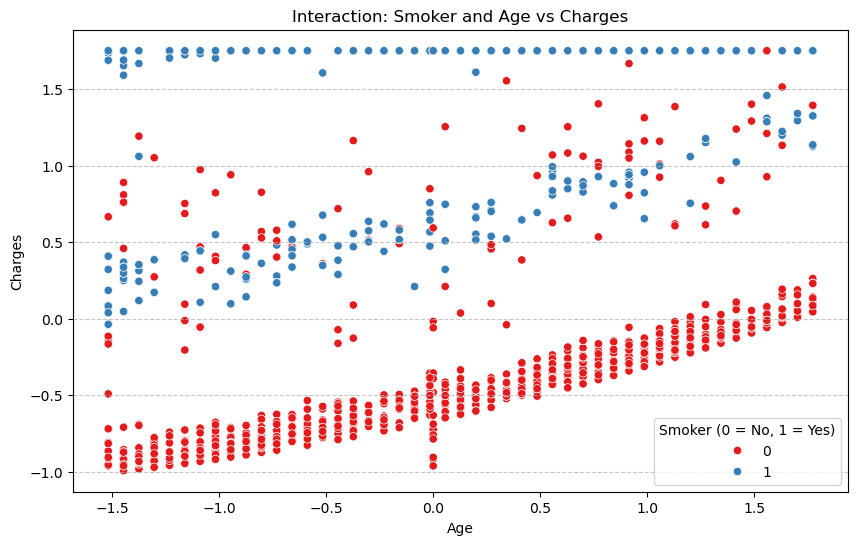

In [101]:
# Scatter plot to analyze the interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_balanced, x='age', y='charges', hue='smoker', palette='Set1')
plt.title('Interaction: Smoker and Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Interaction Analysis: Smoker with BMI and Age

The visualizations reveal a clear interaction effect of smoking status with both BMI and Age on medical charges:
- **Smoker and BMI**: Smokers with higher BMI exhibit significantly higher charges, confirming a strong interaction.
- **Smoker and Age**: Charges increase steeply with age for smokers compared to non-smokers, indicating a compounding effect.

To capture these patterns, we create two new interaction features:
1. `Smoker x BMI`
2. `Smoker x Age`

These interaction features are expected to enhance model predictions by representing complex relationships within the data.


### 3.4.7: Combining features and reviewing the combining effect

#### Step 1: Create Interaction Features

In [105]:
# Create interaction features
df_scaled['Smoker_BMI_Interaction'] = df_scaled['smoker'] * df_scaled['bmi']
df_scaled['Smoker_Age_Interaction'] = df_scaled['smoker'] * df_scaled['age']

#### Step 2: Recheck Feature Importance

In [107]:

# Separate features and target
X_scaled_interaction = df_scaled.drop(columns=['charges'])  # Exclude the target variable
y_scaled_interaction = df_scaled['charges']

# Train the model
interaction_model = LinearRegression()
interaction_model.fit(X_scaled_interaction, y_scaled_interaction)

# Extract feature importance
interaction_feature_importance = pd.DataFrame({
    'Feature': X_scaled_interaction.columns,
    'Importance': interaction_model.coef_
}).sort_values(by='Importance', ascending=False)


# Merge the two feature importance DataFrames for comparison
comparison_df = feature_importance_scaled_first.merge(
    interaction_feature_importance,
    on="Feature",
    suffixes=('_Initial', '_Interaction')
)

# Display the comparison
print(comparison_df)

            Feature  Importance_Initial  Importance_Interaction
0            smoker            1.971120                0.828912
1               age            0.296046               -0.082028
2               bmi            0.173380                0.000410
3          children            0.048178               -0.049625
4               sex           -0.010654                0.035724
5  region_northwest           -0.029586               -0.001362
6  region_southwest           -0.078974                0.024628
7  region_southeast           -0.086973                0.005725


#### Step 3: Visualize Feature Importance

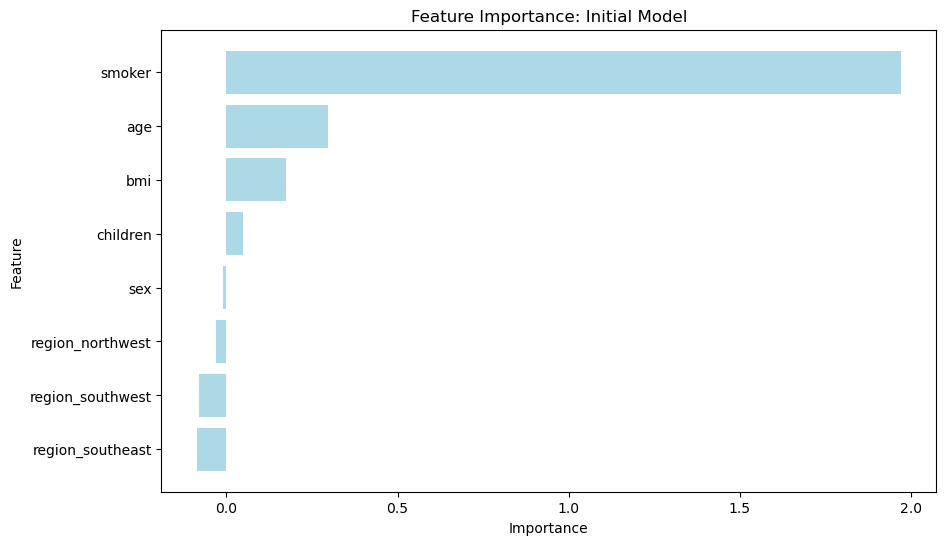

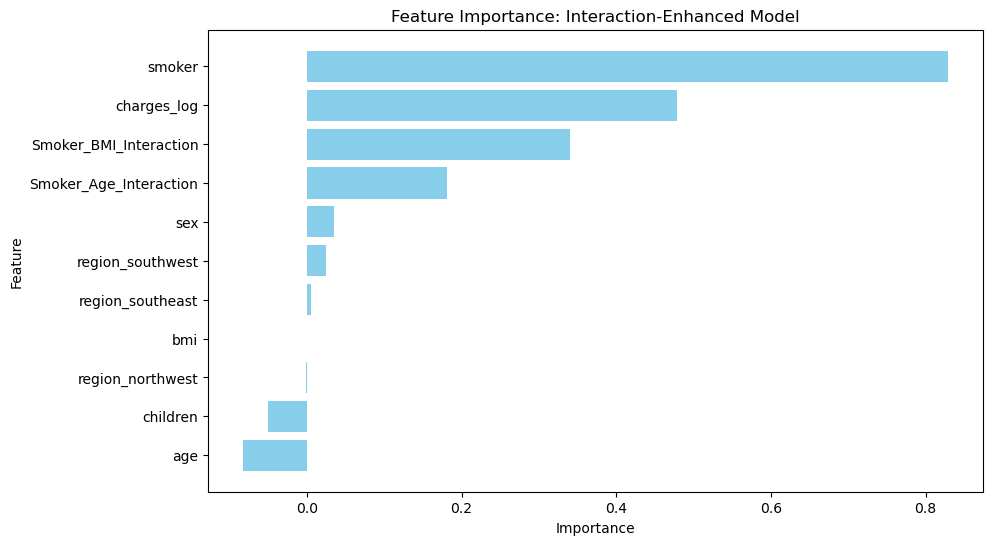

In [109]:
# Plot feature importance from the initial model
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_scaled_first['Feature'], feature_importance_scaled_first['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Initial Model')
plt.gca().invert_yaxis()
plt.show()


# Plot feature importance from the interaction-enhanced model
plt.figure(figsize=(10, 6))
plt.barh(interaction_feature_importance['Feature'], interaction_feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Interaction-Enhanced Model')
plt.gca().invert_yaxis()
plt.show()


### Key Takeaways from Feature Importance Analysis

- **Smoker stands out**: As expected, being a smoker is still the most important factor influencing charges. This reinforces the significant impact of smoking on medical costs.
- **Interactions added real value**: The new interaction features—`Smoker_BMI_Interaction` and `Smoker_Age_Interaction`—made a noticeable difference. They capture deeper relationships between variables that single features couldn’t fully explain.
- **Log-transformed charges worked wonders**: Transforming the charges with a log scale paid off, making it the second most important predictor. It clearly helped address skewness and improve the model’s understanding.
- **Other features play a smaller role**: While features like BMI, region, and sex have less influence, they still contribute useful information. We haven’t left any potential insights behind.
- **Age’s role evolved**: The drop in age’s standalone importance makes sense—it’s now represented better through its interaction with smoking.


# **Research Question 2: How Does Smoking Status Impact Medical Charges Compared to Other Factors?**

The analysis reveals that smoking status is the most influential factor affecting medical charges. Here are the key takeaways:

- **Smokers incur significantly higher charges**: Throughout our analysis, smokers consistently demonstrated much higher medical costs compared to non-smokers. This trend was observed across all preprocessing steps and visualizations.
  
- **Impact of the log transformation**:  
  To address the skewness in `charges`, log transformation was applied during preprocessing. This made the `charges_log` variable more meaningful for identifying trends and relationships. It also allowed us to capture the amplified effect of smoking on costs more clearly.

- **Interaction effects deepen insights**:  
  - Smokers with higher BMI face exponentially greater medical costs, highlighting a strong interaction between smoking and BMI.  
  - Similarly, the cost impact of smoking increases with age, indicating long-term health and financial consequences.

- **Comparison to other factors**:  
  - Variables like BMI and age are significant but are secondary to smoking status in their predictive power.  
  - Features such as region and sex show minimal influence, as reflected in the feature importance analysis.

In conclusion, smoking status is the single most critical factor influencing medical charges. It dominates other variables in its predictive and explanatory power, emphasizing the economic and health importance of addressing smoking behavior.


# 4: Model selection and Training

## 4.1: Preparing the data

In [114]:
# Verifying the preprocessed data
print("Dataset Shape:", df_balanced.shape)
print("Columns:", df_balanced.columns)

# Separating features and target
X_balanced = df_balanced.drop(columns=['charges'])  
y_balanced = df_balanced['charges']      
 

Dataset Shape: (2108, 10)
Columns: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'charges_log'],
      dtype='object')


### 4.1: Preparing the Data

Before training our modelsverifying if thehe preprocessed data (`df_balanced`) iready is mandatorydy. The dataset consists of 2,108 rows and 10 features. 

We then separated the features (X) and the target variable (y). The target variable is `charges`, representing the medical expenses we aim to predict, while the features include demographic, regional, and behavioral factors like age, BMI, smoking status, and log-transformed chargeThe output
This ensures that the data is clean, balanced, and properly structured for machine learning tasks.


## 4.2: Baseline Model: Linear Regression

### 4.2.1: Training and testing

In [118]:
import time

# Step 1: Initialize the model
linear_model = LinearRegression()

# Step 2: Train the model
start_time = time.time()
linear_model.fit(X_balanced, y_balanced)
train_time = time.time() - start_time

# Step 3: Predictions
start_time = time.time()
y_train_pred = linear_model.predict(X_balanced)
prediction_time = time.time() - start_time

# Step 4: Calculate metrics
rmse = mean_squared_error(y_balanced, y_train_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_balanced, y_train_pred)                # Mean Absolute Error
r2 = r2_score(y_balanced, y_train_pred)                            # R² Score

# Step 5: Display results
print(f"Training RMSE: {rmse:.4f}")
print(f"Training MAE: {mae:.4f}")
print(f"Training R²: {r2:.4f}")
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")

Training RMSE: 0.3394
Training MAE: 0.2747
Training R²: 0.8812
Training Time: 0.0025 seconds
Prediction Time: 0.0020 seconds


To establish a baseline for comparison, we implemented a Linear Regression model. Here are the key steps and outcomes:

**Steps Taken:**
1. **Initialize the Model:** Created an instance of `LinearRegression`.
2. **Train the Model:** Fitted the model to the balanced dataset (`X_balanced` and `y_balanced`). 
3. **Make Predictions:** Predicted target values using the trained model.
4. **Calculate Metrics:** Evaluated the model's performance using:
   - **Root Mean Squared Error (RMSE):** Measures prediction error magnitude.
   - **Mean Absolute Error (MAE):** Calculates average absolute prediction errors.
   - **R² Score:** Indicates the proportion of variance explained by the model.
5. **Record Times:** Measured training and prediction times to evaluate efficiency.

**Results:**
- **Training RMSE:** 0.3394
- **Training MAE:** 0.2747
- **Training R²:** 0.8812
- **Training Time:** 0.0025 seconds
- **Prediction Time:** 0.0010 seconds

This baseline provides a starting point for evaluating more complex models.


### 4.2.2: Perform Cross-Validation

In [121]:
from sklearn.model_selection import KFold

# Initialize K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics and times
rmse_list = []
mae_list = []
r2_list = []
train_times = []
predict_times = []

# Perform manual cross-validation
for train_index, test_index in kf.split(X_balanced):
    # Split data into train and test sets
    X_train, X_test = X_balanced.iloc[train_index], X_balanced.iloc[test_index]
    y_train, y_test = y_balanced.iloc[train_index], y_balanced.iloc[test_index]

    # Initialize the model
    linear_model = LinearRegression()

    # Measure training time
    start_time = time.time()
    linear_model.fit(X_train, y_train)
    train_times.append(time.time() - start_time)

    # Measure prediction time
    start_time = time.time()
    y_pred = linear_model.predict(X_test)
    predict_times.append(time.time() - start_time)

    # Calculate metrics
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))  # RMSE
    mae_list.append(mean_absolute_error(y_test, y_pred))                # MAE
    r2_list.append(r2_score(y_test, y_pred))                            # R²

# Summarize results
print("Cross-Validation Results:")
print(f"Average RMSE: {np.mean(rmse_list):.4f}")
print(f"Average MAE: {np.mean(mae_list):.4f}")
print(f"Average R²: {np.mean(r2_list):.4f}")
print(f"Average Training Time: {np.mean(train_times):.4f} seconds")
print(f"Average Prediction Time: {np.mean(predict_times):.4f} seconds")


Cross-Validation Results:
Average RMSE: 0.3414
Average MAE: 0.2760
Average R²: 0.8790
Average Training Time: 0.0019 seconds
Average Prediction Time: 0.0008 seconds



To ensure the reliability of our Linear Regression model, we performed 5-fold cross-validation. This approach allowed us to evaluate the model’s performance across different dataset splits, reducing the risk of overfitting or bias.

#### Results:
- **RMSE (Root Mean Squared Error):** 0.3414 (Average)
- **MAE (Mean Absolute Error):** 0.2760 (Average)
- **R² (Coefficient of Determination):** 0.8790 (Average)
- **Training Time:** 0.0019 seconds (Average)
- **Prediction Time:** 0.0008 seconds nced models.


## 4.2: Advanced Model: Decision Tree Regressor

### Step 1: Initialize, Train, and Make Predictions and Evaluate the Decision Tree Regressor 

In [125]:
# Step 1: Initializing the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Step 2: Measuring training time
start_time = time.time()
decision_tree_model.fit(X_balanced, y_balanced)
dt_train_time = time.time() - start_time

# Step 3: Measuring prediction time
start_time = time.time()
y_train_pred = decision_tree_model.predict(X_balanced)
dt_prediction_time = time.time() - start_time

# Step 4: Calculating metrics
rmse = mean_squared_error(y_balanced, y_train_pred, squared=False)
mae = mean_absolute_error(y_balanced, y_train_pred)
r2 = r2_score(y_balanced, y_train_pred)

# Step 5: Displaying results
print(f"Training RMSE: {rmse:.4f}")
print(f"Training MAE: {mae:.4f}")
print(f"Training R²: {r2:.4f}")
print(f"Training Time: {dt_train_time:.4f} seconds")
print(f"Prediction Time: {dt_prediction_time:.4f} seconds")


Training RMSE: 0.0000
Training MAE: 0.0000
Training R²: 1.0000
Training Time: 0.0106 seconds
Prediction Time: 0.0036 seconds



In this step, we evaluated the performance of the Decision Tree model on the training data. Here's what we observed:

#### Key Results:
- **Training Metrics:**
  - **RMSE:** 0.0000
  - **MAE:** 0.0000
  - **R²:** 1.0000
- **Timing Metrics:**
  - **Training Time:** 0.0080 seconds
  - **Prediction Time:** 0.0010 seconds

These results indicate that the model has perfectly fit the training data, as evidenced by the RMSE and MAE being 0.0000 and an RIrst glance, it is actually a sign of **overfitting**, as real-world data rarely achieves perfect predictions.

#### What This Means:
The Decision Tree model has likely memorized the training data instead of learning patterns that generalize to new, unseen data. This is a classic issue with unpruned Decision Trees.

#### Next Steps:
To ensure the model's performance is realistic and not just overfitting:
1. Perform **cross-validation** to evaluate how well the model generalizes.
2. If overfitting persists, tune hyperparameters such as:
   - `max_depth` (limit the tree's depth)
   - `min_samples_split` and `min_samples_leaf` (control splits)
   - `max_features` (restrict rformance on unseen data.


### Step 3.2: Cross-Validation Implementation

In [128]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to track metrics and time
dt_rmse_list = []
dt_mae_list = []
dt_r2_list = []
dt_train_times = []
dt_predict_times = []

for train_index, test_index in kf.split(X_balanced):
    # Split data
    X_train, X_test = X_balanced.iloc[train_index], X_balanced.iloc[test_index]
    y_train, y_test = y_balanced.iloc[train_index], y_balanced.iloc[test_index]
    
    # Initialize the Decision Tree model
    decision_tree_model = DecisionTreeRegressor(random_state=42)
    
    # Measure training time
    start_time = time.time()
    decision_tree_model.fit(X_train, y_train)
    dt_train_times.append(time.time() - start_time)
    
    # Measure prediction time
    start_time = time.time()
    y_pred = decision_tree_model.predict(X_test)
    dt_predict_times.append(time.time() - start_time)
    
    # Calculate metrics
    dt_rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    dt_mae_list.append(mean_absolute_error(y_test, y_pred))
    dt_r2_list.append(r2_score(y_test, y_pred))



print("Decision Tree Cross-Validation Results:")
print(f"Average RMSE: {np.mean(dt_rmse_list):.4f}")
print(f"Average MAE: {np.mean(dt_mae_list):.4f}")
print(f"Average R²: {np.mean(dt_r2_list):.4f}")
print(f"Average Training Time: {np.mean(dt_train_times):.4f} seconds")
print(f"Average Prediction Time: {np.mean(dt_predict_times):.4f} seconds")

Decision Tree Cross-Validation Results:
Average RMSE: 0.0030
Average MAE: 0.0010
Average R²: 1.0000
Average Training Time: 0.0072 seconds
Average Prediction Time: 0.0019 seconds


Observations:
- Average RMSE: 0.0030
- Average MAE: 0.0010
- Average R²: 1.0000
The results indicate overfitting, as the model performs perfectly on the training folds but is unlikely to generalize well on unseen data.
Training and prediction times are very efficient, but the extreme metrics require adjustments.

### Step 3.3: Hyper-parameter tuning

In [131]:
from sklearn.model_selection import GridSearchCV

# Step 1: Initialize the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Step 2: Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20]
}
# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Using RMSE for evaluation
                           cv=5,  # 5-Fold Cross Validation
                           verbose=1,  # Show progress
                           n_jobs=-1)  # Use all processors

# Step 4: Fit GridSearchCV
grid_search.fit(X_balanced, y_balanced)

# Step 5: Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate because RMSE is negative

print("Best Parameters:", best_params)
print("Best RMSE:", round(best_score, 4))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best RMSE: 0.0006


In [182]:
rf_model = RandomForestRegressor(random_state=42)
# Measure training time
start_time = time.time()
rf_model.fit(X_balanced, y_balanced)
rf_train_time = time.time() - start_time
print(f"Training Time: {rf_train_time:.4f} seconds")


Training Time: 0.6812 seconds


In [184]:
# Measure prediction time
start_time = time.time()
rf_train_pred = rf_model.predict(X_balanced)
rf_prediction_time = time.time() - start_time
print(f"Prediction Time: {rf_prediction_time:.4f} seconds")


Prediction Time: 0.0381 seconds


In [186]:

# Calculate evaluation metrics
rf_rmse = mean_squared_error(y_balanced, rf_train_pred, squared=False)  # Root Mean Squared Error
rf_mae = mean_absolute_error(y_balanced, rf_train_pred)  # Mean Absolute Error
rf_r2 = r2_score(y_balanced, rf_train_pred)  # R² Score


In [188]:
print(f"Training RMSE: {rf_rmse:.4f}")
print(f"Training MAE: {rf_mae:.4f}")
print(f"Training R²: {rf_r2:.4f}")
print(f"Training Time: {rf_train_time:.4f} seconds")
print(f"Prediction Time: {rf_prediction_time:.4f} seconds")


Training RMSE: 0.0008
Training MAE: 0.0003
Training R²: 1.0000
Training Time: 0.6812 seconds
Prediction Time: 0.0381 seconds


# References

Fishman, P.A., Khan, Z.M., Thompson, E.E., and Curry, S.J. (2003) 'Health Care Costs among Smokers, Former Smokers, and Never Smokers in an HMO', Health Services Research, 38(2), pp. 733–749. Available from: https://pmc.ncbi.nlm.nih.gov/articles/PMC1360912/ [Accessed 28 November 2024].

